## Nedbørsoppgaven Del 4: Maipulering av datasett

I del 1 og 3 har vi gått gjennom 
- indeksering og hvordan man kan dele inn en tidsserie ved helg av indeksering, 
- hvordan man plotter tidsserier ved hjelp av pakken `matplotlib`. 

Nå skal vi bruke dette til å se på hvordan man kan velge ut spesifikke indekser fra et datasett og sette dette sammen til et nytt datasett. Ved hjelp av Del 3 kan vi fremstille resultatet på en oversiktlig måte. 

#### Last inn pakkene som tengs

In [3]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib
import requests # for filinnlasting
import io # for filinnlasting
from EkteDataFunk import loadData # for filinnlasting

#### 1. Last inn et datasett
For denne delen bruker vi et større datasett enn i Del 1 til 3 slik at vi har litt mer å ta utgangspunkt i. Dette datasettet har like mange rader, men 13 kolonner: en for tid, og tolv for hver av månedene.  

In [4]:
file='TempBergen.txt'
temp,tid = loadData(file)

In [5]:
tid, temp, temp.shape

(array([1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
        1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
        1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
        1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
        1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
        1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
        1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
        1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
        1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
        1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
        1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
        1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
        1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
        1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
      

"temp" er for stor til å vise hele - matrisen har 161 rader og 12 kolonner. Derfor er det  "..." for å vise at ikke hele datasettet vises. 

#### 2. Del datasettet inn i sesonger
Siden vi nå har verdier for alle månedene, og ikke bare års-gjennomsnitt, kan vi sammenligne månedene mot hverandre, men vi kan også se på sesongene i forhold til hverandre. Det er lettere å sammenligne fire tidsserier enn 12 tidsserier, og det er ikke sikkert man alltid trenger alle detaljene fra hver måned selv om årsoppløsningen er for lav. Det er dette vi skal gjøre i denne delen: sette månedene sammen til sesonger, og se på endringen i sesongene over tid. 

In [6]:
# Spring: alle rader utenom den siste (kun NaN) og kolonne 2 til og ikke med 5,
# altså mars, april og mai
spring=temp[:-1,2:5] 

# Summer: alle rader utenom den siste (kun NaN) og kolonnene for juni, juli 
# og august
summer=temp[:-1,5:8]

# Fall: alle rader utenom den siste (kun NaN) og kolonnenen for september, 
# oktober og november
fall=temp[:-1,8:11]

#### 3. Spesialbehandling for vinter
Vinter er litt tricky: januar og februar, og desember samme år hører ikke til samme vinter. Vi deler derfor vinter inn i Des (desember) og JanFeb  (januar og februar), og setter dem sammen igjen til en matrise etterpå. Vinter 1862 blir den første vinter-verdien vi har, og vinter 2021 den siste. Vi har altså like mange vinter-verdiene som vår, sommer og høst-verdier, men vinter-verdiene er forskjøvet med ett år. Ta en titt på hvordan datasettet ser ut her, så blir det tydeligere hvorfor vinterverdiene er forskjøvet: https://github.com/irendundas/EkteData/blob/main/TempBergen.txt

In [7]:
Des=temp[0:len(temp)-1,11] 
# Vi må bruke 0:len(temp)-1 fordi vi ikke vil ha med den aller siste 
# desember-verdien

JanFeb=temp[1:,1:3] # Jan og Feb fra og med 1862, kolonne 1 og 2. 

Nå er "JanFeb" alle januar og februar-månedene fra 1862 til 2021, mens "Des" er desember fra 1861 til 2020. Vi lar Januar og Februar "bestemme" hvilket år vinteren hører til, så vi har altså vinter-data fra 1862-2021. 

Vi vil sette disse to arrayene sammen til ett array slik at det får likt oppsett som de andre sesongene. Det finnes mange måter å gjøre dette på, og vi går gjennom tre metoder her

**Metode 1:**
Lag et tomt array med rette dimensjoner og plugg arrayene du vil sette sammen inn i det tomme arrayet. Dette forutsetter at du vet de endelige dimensjonene på forhånd. 

In [8]:
JanFeb.shape, Des.shape

((160, 2), (160,))

In [9]:
winter=np.zeros((160,3)) # 160 år, 3 måneder
winter[:,0:2]=JanFeb
winter[:,2]=Des
winter

array([[ 0.8,  1.9,  4.7],
       [ 3.3,  3.6,  4.5],
       [-0.5,  1.5,  2.2],
       [-1.8,  0.9,  3.2],
       [ 1.2, -0.4,  6.1],
       [ 3. , -0.3,  1.9],
       [ 2.6,  4.9,  1.4],
       [ 2.9,  0.9,  4.1],
       [-1.1,  1.8,  0.1],
       [ nan,  5.5, -2.2],
       [ 3.4,  3.9,  2. ],
       [ 1.2,  4.3,  0.1],
       [ 3.4,  4.5,  6.5],
       [-1.7,  1.8, -3.5],
       [ 0. ,  2.4,  3.4],
       [ 0. ,  0.1, -1.2],
       [ 2.9,  2.3,  3.4],
       [-1. ,  0.7, -5.1],
       [ 3.7,  3.9,  2. ],
       [-1.6, -1.5, -0.1],
       [ 3.1,  4.7,  5.9],
       [ 2.8,  0.1, -1.5],
       [ 2.9,  5.7,  3.4],
       [ 3.2,  1.9,  3.2],
       [-0.5,  1.5,  3.9],
       [ 3.3,  4.7,  0. ],
       [-2. , -0.9,  0.3],
       [-1.5,  0.1,  5.9],
       [ 1.1,  5.3,  3.7],
       [ 3.2, -0.3,  0.1],
       [-0.1,  2.3,  4.6],
       [ 0.5,  5. ,  0.1],
       [ 1.9,  6.5,  5.8],
       [-3.6,  2.7,  4.9],
       [ 2.4,  3.4,  0.8],
       [ 0.8,  3.4,  1.6],
       [ 1.3,  2.2,  3.4],
 

**Metode 2:**
Bruk en ny funksjon: `np.concatenate`. Denne funksjonen tar et sett med matriser eller vektorer og setter dem sammen langs den aksen du spesifiserer. Vektorene/matrisene må være like lange langs en av aksene, i dette tilfellet tidsaksen. For at dimensjonene skal stemme må vi også legge til en dimensjon for "Des". Opprinnelig har denne vektoren `Des.shape = (160,)`, men for å settes sammen med JanFeb som har `JanFeb.shape = (160,2)` må Des også ha to dimensjoner. `Des[:,np.newaxis].shape = (160,1)`, altså to dimensjoner, så da fungerer np.concatenate. 

In [10]:
winter=np.concatenate((JanFeb,Des[:,np.newaxis]),axis=1)
winter

array([[ 0.8,  1.9,  4.7],
       [ 3.3,  3.6,  4.5],
       [-0.5,  1.5,  2.2],
       [-1.8,  0.9,  3.2],
       [ 1.2, -0.4,  6.1],
       [ 3. , -0.3,  1.9],
       [ 2.6,  4.9,  1.4],
       [ 2.9,  0.9,  4.1],
       [-1.1,  1.8,  0.1],
       [ nan,  5.5, -2.2],
       [ 3.4,  3.9,  2. ],
       [ 1.2,  4.3,  0.1],
       [ 3.4,  4.5,  6.5],
       [-1.7,  1.8, -3.5],
       [ 0. ,  2.4,  3.4],
       [ 0. ,  0.1, -1.2],
       [ 2.9,  2.3,  3.4],
       [-1. ,  0.7, -5.1],
       [ 3.7,  3.9,  2. ],
       [-1.6, -1.5, -0.1],
       [ 3.1,  4.7,  5.9],
       [ 2.8,  0.1, -1.5],
       [ 2.9,  5.7,  3.4],
       [ 3.2,  1.9,  3.2],
       [-0.5,  1.5,  3.9],
       [ 3.3,  4.7,  0. ],
       [-2. , -0.9,  0.3],
       [-1.5,  0.1,  5.9],
       [ 1.1,  5.3,  3.7],
       [ 3.2, -0.3,  0.1],
       [-0.1,  2.3,  4.6],
       [ 0.5,  5. ,  0.1],
       [ 1.9,  6.5,  5.8],
       [-3.6,  2.7,  4.9],
       [ 2.4,  3.4,  0.8],
       [ 0.8,  3.4,  1.6],
       [ 1.3,  2.2,  3.4],
 

Alternativt kunne man definert `Des=temp[0:len(temp)-1,11:]`. Da får Des automatisk dimensjonene (160,1). "11:" gjør at Des kommer på tabell-format (array) slik som 
"JanFeb" og ikke en liste.

In [11]:
Des=temp[0:len(temp)-1,11:]
winter=np.concatenate((JanFeb,Des),axis=1)
winter

array([[ 0.8,  1.9,  4.7],
       [ 3.3,  3.6,  4.5],
       [-0.5,  1.5,  2.2],
       [-1.8,  0.9,  3.2],
       [ 1.2, -0.4,  6.1],
       [ 3. , -0.3,  1.9],
       [ 2.6,  4.9,  1.4],
       [ 2.9,  0.9,  4.1],
       [-1.1,  1.8,  0.1],
       [ nan,  5.5, -2.2],
       [ 3.4,  3.9,  2. ],
       [ 1.2,  4.3,  0.1],
       [ 3.4,  4.5,  6.5],
       [-1.7,  1.8, -3.5],
       [ 0. ,  2.4,  3.4],
       [ 0. ,  0.1, -1.2],
       [ 2.9,  2.3,  3.4],
       [-1. ,  0.7, -5.1],
       [ 3.7,  3.9,  2. ],
       [-1.6, -1.5, -0.1],
       [ 3.1,  4.7,  5.9],
       [ 2.8,  0.1, -1.5],
       [ 2.9,  5.7,  3.4],
       [ 3.2,  1.9,  3.2],
       [-0.5,  1.5,  3.9],
       [ 3.3,  4.7,  0. ],
       [-2. , -0.9,  0.3],
       [-1.5,  0.1,  5.9],
       [ 1.1,  5.3,  3.7],
       [ 3.2, -0.3,  0.1],
       [-0.1,  2.3,  4.6],
       [ 0.5,  5. ,  0.1],
       [ 1.9,  6.5,  5.8],
       [-3.6,  2.7,  4.9],
       [ 2.4,  3.4,  0.8],
       [ 0.8,  3.4,  1.6],
       [ 1.3,  2.2,  3.4],
 

#### 4. Gjennomsnitt av hver sesong 
Vi kan nå ta gjennomsnittet av hver årstid. Siden det finnes NaN-verdier i datasettet må vi bruke np.nanmean

In [12]:
winter=np.nanmean(winter,axis=1) 
spring=np.nanmean(spring,axis=1)
summer=np.nanmean(summer,axis=1)
fall=np.nanmean(fall,axis=1) 

#### 5. Lag en figur
Vi kan nå plotte alle sesongene i samme figur

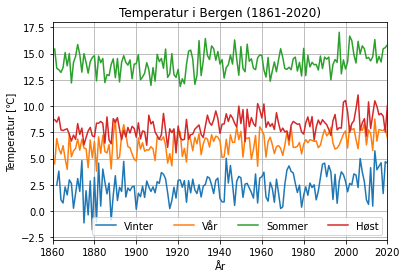

In [58]:
string=('Vinter','Vår','Sommer','Høst')

ax=plt.axes() # Lag akser å plotte i

ax.plot(tid[1:],winter, label=string[0]) # tid[1:] fordi vi ikke har vinter-verdier for 1861
ax.plot(tid[:-1],spring, label=string[1])
ax.plot(tid[:-1],summer, label=string[2])
ax.plot(tid[:-1],fall, label=string[3])
ax.legend(loc='lower right', ncol=len(string))

ax.set(
    title='Temperatur i Bergen (1861-2020)',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020]
)# Sett grense for x-aksen

plt.grid()

#### 6. Månedlig oppløsning med `np.reshape`
En annen nyttig ting kan være å plotte hele tidsserien med månedlig oppløsning. Men da må de radene med måneder settes etter hverandre til en lang tidsserie. 

En enkel måte å gjøre dette på er med np.reshape. Denne funksjonen bevarer alle verdiene men endrer dimensjonene. "temp" har nå dimensjoner (161, 12). Med np.reshape kan man gi "temp" dimensjonene (161x12,1) istedet.

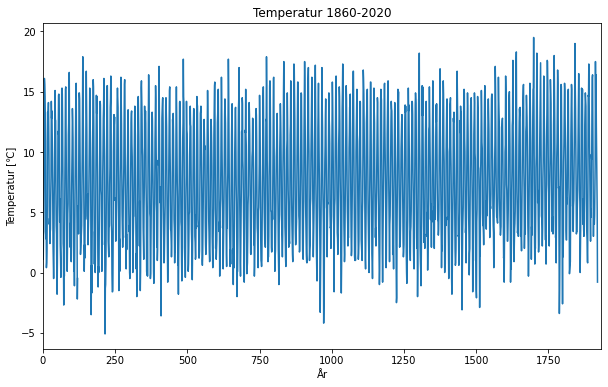

In [54]:
temp_mo=np.reshape(temp,(161*12,1))

fig=plt.figure(figsize=(10, 6)) # Lag akser å plotte i
ax = fig.add_subplot(111)

# Plot tidsserien
ax.plot(temp_mo)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(0,len(temp_mo)) # sett grense for x-aksen
) 

plt.show()

Dette ble veldig rotete. Gi en forklaring på hvorfor, utover at det er mange flere datapunkt. 

#### 7. Månedlig oppløsning og årlig oppløsning i samme figur
Det skjer mye på midten av plottet, mens toppen og bunnen virker mer organisert. Vi vil plotte tidsserien sammen med sommer- og vinter-gjennomsnittene for å se om det finnes en sammenheng. 

**Lag en tidsvektor manuelt.**
Vi har imidlertid ingen tidvektor for den månedlige tidsserien. De må vi lage selv. Det finnes funksjoner for slikt i Python, men siden vi opererer med måneder og ikke trenger å ta stilling til skuddår og slikt kan det gjøres manuelt. Vi tar utgangspunkt i tidsvektoren over år. Hver måned skal være `1/12` år lengre enn forrige måned. 

Vi bruker denne fremgangsmåten:

- Lager igjen en matrise med kun nuller, som da vi satte sammen vinter-månedene i Metode 1, men denne ganger med `shape.temp=(161,12)`

In [43]:
time_mo=np.zeros(temp.shape) # 161 år, 12 måneder

- Januar er året uten noen desimaler, altså `året + 1/12*0`. Sett derfor kolonne 0 = tid

In [44]:
time_mo[:,0]=tid

- Februar skal være `året + 1/12*1`, mars er `året + 1/12*2` etc

In [45]:
# Dette kunne man gjort mye mer elegant med hjelp av en for-løkke, det kommer 
# vi til i neste del, Del 5. 

time_mo[:,1]=tid+1/12*1
time_mo[:,2]=tid+1/12*2
time_mo[:,3]=tid+1/12*3
time_mo[:,4]=tid+1/12*4
time_mo[:,5]=tid+1/12*5
time_mo[:,6]=tid+1/12*6
time_mo[:,7]=tid+1/12*7
time_mo[:,8]=tid+1/12*8
time_mo[:,9]=tid+1/12*9
time_mo[:,10]=tid+1/12*10
time_mo[:,11]=tid+1/12*11

In [46]:
time_mo

array([[1861.        , 1861.08333333, 1861.16666667, ..., 1861.75      ,
        1861.83333333, 1861.91666667],
       [1862.        , 1862.08333333, 1862.16666667, ..., 1862.75      ,
        1862.83333333, 1862.91666667],
       [1863.        , 1863.08333333, 1863.16666667, ..., 1863.75      ,
        1863.83333333, 1863.91666667],
       ...,
       [2019.        , 2019.08333333, 2019.16666667, ..., 2019.75      ,
        2019.83333333, 2019.91666667],
       [2020.        , 2020.08333333, 2020.16666667, ..., 2020.75      ,
        2020.83333333, 2020.91666667],
       [2021.        , 2021.08333333, 2021.16666667, ..., 2021.75      ,
        2021.83333333, 2021.91666667]])

- Bruk np.reshape akkurat som for temperatur for å lage en lang vektor heller enn en matrise

In [47]:
time_mo=np.reshape(time_mo,(161*12,1))
time_mo

array([[1861.        ],
       [1861.08333333],
       [1861.16666667],
       ...,
       [2021.75      ],
       [2021.83333333],
       [2021.91666667]])

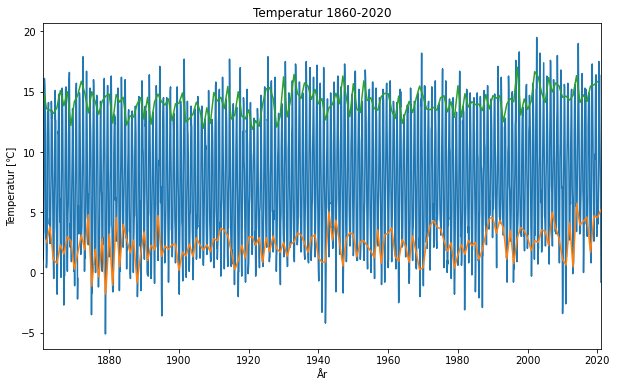

In [53]:
fig=plt.figure(figsize=(10, 6)) # Lag akser å plotte i
ax = fig.add_subplot(111)

# Plot tidsserien
ax.plot(time_mo,temp_mo)
ax.plot(tid[1:],winter)
ax.plot(tid[:-1],summer)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]) # sett grense for x-aksen
)

plt.show()

Diskuter igjen forklaring på hvorfor det skjer så mye på midten av plottet, og kommenter på sommer- og vinter-gjennomsnittene i forhold til månedsgjennomsnittene.

Lag en tilsvarende figur som den over, men plot januar og juli istedet for sommer og vinter. Inkluder en legend i figuren.

Diskuter forskjellene.

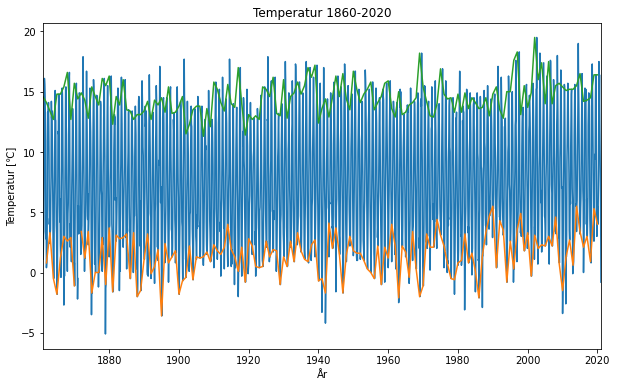